# Análise de dados do Covid19 em Palmas-TO e Região

## Objetivos Gerais

Este projeto tem por objetivo analisar os casos de covid19 no Tocantins e verificar se é possível descobrir informações relevantes sobre o vírus fazendo a análise exploratória dos dados e a utilização de algoritmos de machine learning. Os dados são do ministério da saúde que registram os de casos do covid no Brasil.

## Objetivos específicos

1. Aquisição da base de dados;
2. Análise dos dados;
3. Visualização dos dados;

In [1]:
#Imports
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Padronizar paleta de cores
sns.set_palette(palette='YlGnBu')
sns.set_style('darkgrid')

In [2]:
#Aquisição dos dados
PROJECT_DIR = '.'
DATA_DIR = 'data'
DATA_PATH = os.path.join(PROJECT_DIR, DATA_DIR)

In [30]:
import glob 

filenames = glob.glob(DATA_PATH + "/*.csv")
df = pd.DataFrame()

# for loop to iterate all csv files 
for file in filenames: 
    df_ = pd.read_csv(file, sep=';')
    
    # Concatenando dataframes
    df = pd.concat([df, df_], axis=0)


df_tocantins = df[df['estado'] == 'TO']
df_tocantins.to_csv('./data/tocantins.csv', index=False)

### Leitura dos dados

In [39]:
df_tocantins = pd.read_csv('./data/tocantins.csv')

df_tocantins = df_tocantins[~df_tocantins['municipio'].isna()]

In [42]:
df_tocantins.drop(df_tocantins.filter(regex="Unname"),axis=1, inplace=True)

In [43]:
df_tocantins

regiao estado    municipio  coduf    codmun  codRegiaoSaude  \
368    Norte     TO  Abreulândia   17.0  170025.0         17007.0   
369    Norte     TO  Abreulândia   17.0  170025.0         17007.0   
370    Norte     TO  Abreulândia   17.0  170025.0         17007.0   
371    Norte     TO  Abreulândia   17.0  170025.0         17007.0   
372    Norte     TO  Abreulândia   17.0  170025.0         17007.0   
...      ...    ...          ...    ...       ...             ...   
96752  Norte     TO      Xambioá   17.0  172210.0         17001.0   
96753  Norte     TO      Xambioá   17.0  172210.0         17001.0   
96754  Norte     TO      Xambioá   17.0  172210.0         17001.0   
96755  Norte     TO      Xambioá   17.0  172210.0         17001.0   
96756  Norte     TO      Xambioá   17.0  172210.0         17001.0   

            nomeRegiaoSaude        data  semanaEpi  populacaoTCU2019  \
368                  CANTAO  2021-07-01       26.0            2579.0   
369                  CANTAO  2021-07-02       26.0            2579.0   
370                  CANTAO  2021-07-03       26.0            2579.0   
371                  CANTAO  2021-07-04       27.0            2579.0   
372                  CANTAO  2021-07-05       27.0            2579.0   
...                     ...         ...        ...               ...   
96752  MEDIO NORTE ARAGUAIA  2020-07-27       31.0           11540.0   
96753  MEDIO NORTE ARAGUAIA  2020-07-28       31.0           11540.0   
96754  MEDIO NORTE ARAGUAIA  2020-07-29       31.0           11540.0   
96755  MEDIO NORTE ARAGUAIA  2020-07-30       31.0           11540.0   
96756  MEDIO NORTE ARAGUAIA  2020-07-31       31.0           11540.0   

       casosAcumulado  casosNovos  obitosAcumulado  obitosNovos  \
368             274.0       274.0              6.0          6.0   
369             274.0         0.0              6.0          0.0   
370             274.0         0.0              6.0          0.0   
371             276.0         2.0              6.0          0.0   
372             276.0         0.0              6.0          0.0   
...               ...         ...              ...          ...   
96752           543.0         8.0              8.0          0.0   
96753           545.0         2.0              8.0          0.0   
96754           549.0         4.0              8.0          0.0   
96755           552.0         3.0              8.0          0.0   
96756           562.0        10.0              8.0          0.0   

       Recuperadosnovos  emAcompanhamentoNovos  interior/metropolitana  
368                 NaN                    NaN                     0.0  
369                 NaN                    NaN                     0.0  
370                 NaN                    NaN                     0.0  
371                 NaN                    NaN                     0.0  
372                 NaN                    NaN                     0.0  
...                 ...                    ...                     ...  
96752               NaN                    NaN                     0.0  
96753               NaN                    NaN                     0.0  
96754               NaN                    NaN                     0.0  
96755               NaN                    NaN                     0.0  
96756               NaN                    NaN                     0.0  

[95354 rows x 17 columns]

In [48]:
import json

tocantins_regioes = json.load(open('tocantins.json', 'r'))

In [73]:
geojson = px.data.election_geojson()

In [75]:
geojson['features']

[{'type': 'Feature',
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[-73.6363215300962, 45.5759177646435],
      [-73.6362833815582, 45.5758266113331],
      [-73.6446417578686, 45.5658132919643],
      [-73.6453511352974, 45.5647725775888],
      [-73.648867564748, 45.5586898267402],
      [-73.6513170845065, 45.5545659435652],
      [-73.6515658357324, 45.5554439857955],
      [-73.6660837831645, 45.5596724837829],
      [-73.6706609041685, 45.5610978251999],
      [-73.6676019919116, 45.5632340862888],
      [-73.6645385824068, 45.5642716484367],
      [-73.663663123697, 45.5654269638586],
      [-73.663336397858, 45.5666288247853],
      [-73.6637764768649, 45.5678900619231],
      [-73.6625073244826, 45.5688479494114],
      [-73.6624620526633, 45.5708304456346],
      [-73.6620201425015, 45.5713925326191],
      [-73.6616100197742, 45.5737924780218],
      [-73.6612199500215, 45.5747171555678],
      [-73.6625087613399, 45.5748980132699],
      [-73.6639172423219, 45

In [67]:
tocantins_regioes['features'][0]['properties']['name']

'Abreulândia'

In [80]:
df_tocantins['municipio']

368      Abreulândia
369      Abreulândia
370      Abreulândia
371      Abreulândia
372      Abreulândia
            ...     
96752        Xambioá
96753        Xambioá
96754        Xambioá
96755        Xambioá
96756        Xambioá
Name: municipio, Length: 95354, dtype: object

In [92]:
import plotly.express as px
import plotly.graph_objects as go

import numpy as np


fig = px.choropleth(df_tocantins, locations='municipio', 
                    color='casosNovos', geojson=tocantins_regioes,
                    featureidkey='properties.name',
                    center={"lat": -9.370232849190968, "lon": -47.926742249757595},
                          color_continuous_scale='Viridis')

fig.update_layout(paper_bgcolor="#242424", mapbox_style="carto-darkmatter", autosize=True,
                    margin=go.layout.Margin(l=0, r=0, t=0, b=0), showlegend=False)

fig.show()

#### Colunas

In [18]:
df_tocantins.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana',
       'Unnamed: 0', 'Unnamed: 0.1'],
      dtype='object')

In [19]:
df_tocantins['codRegiaoSaude'].value_counts()

17002.0    49392
17004.0    47334
17005.0    37044
17001.0    34986
17007.0    30870
17003.0    30870
17006.0    28812
17008.0    26754
Name: codRegiaoSaude, dtype: int64

In [20]:
df_tocantins['nomeRegiaoSaude'].value_counts()

BICO DO PAPAGAIO              49392
CERRADO TOCANTINS ARAGUAIA    47334
ILHA DO BANANAL               37044
MEDIO NORTE ARAGUAIA          34986
CANTAO                        30870
SUDESTE                       30870
CAPIM DOURADO                 28812
AMOR PERFEITO                 26754
Name: nomeRegiaoSaude, dtype: int64

In [21]:
df_tocantins['semanaEpi'].value_counts()

26    5922
48    5922
50    5922
51    5922
27    5922
1     5922
2     5922
3     5922
4     5922
5     5922
14    5922
15    5922
16    5922
17    5922
18    5922
19    5922
20    5922
21    5922
22    5922
23    5922
24    5922
49    5922
52    5922
47    5922
46    5922
28    5922
29    5922
30    5922
31    5922
32    5922
33    5922
34    5922
35    5922
36    5922
37    5922
38    5922
25    5922
39    5922
40    5922
41    5922
42    5922
43    5922
44    5922
45    5922
6     5076
13    3822
10    2982
12    2982
11    2982
9     2976
8     2961
7     2961
53    2961
Name: semanaEpi, dtype: int64

In [60]:
df_tocantins['municipio'].unique()

array([nan, 'Abreulândia', 'Aguiarnópolis', 'Aliança do Tocantins',
       'Almas', 'Alvorada', 'Ananás', 'Angico', 'Aparecida do Rio Negro',
       'Aragominas', 'Araguacema', 'Araguaçu', 'Araguaína', 'Araguanã',
       'Araguatins', 'Arapoema', 'Arraias', 'Augustinópolis',
       'Aurora do Tocantins', 'Axixá do Tocantins', 'Babaçulândia',
       'Bandeirantes do Tocantins', 'Barra do Ouro', 'Barrolândia',
       'Bernardo Sayão', 'Bom Jesus do Tocantins',
       'Brasilândia do Tocantins', 'Brejinho de Nazaré',
       'Buriti do Tocantins', 'Cachoeirinha', 'Campos Lindos',
       'Cariri do Tocantins', 'Carmolândia', 'Carrasco Bonito', 'Caseara',
       'Centenário', 'Chapada de Areia', 'Chapada da Natividade',
       'Colinas do Tocantins', 'Combinado', 'Conceição do Tocantins',
       'Couto Magalhães', 'Cristalândia', 'Crixás do Tocantins',
       'Darcinópolis', 'Dianópolis', 'Divinópolis do Tocantins',
       'Dois Irmãos do Tocantins', 'Dueré', 'Esperantina', 'Fátima',
       

In [23]:
df_tocantins['populacaoTCU2019']

0         1572866.0
1         1572866.0
2         1572866.0
3         1572866.0
4         1572866.0
            ...    
290266      11540.0
290267      11540.0
290268      11540.0
290269      11540.0
290270      11540.0
Name: populacaoTCU2019, Length: 290271, dtype: float64

In [24]:
df_tocantins['interior/metropolitana'].value_counts()

0.0    253134
1.0     32928
Name: interior/metropolitana, dtype: int64

## Preparação dos dados

In [68]:
df_tocantins['interior/metropolitana'] = df_tocantins['interior/metropolitana'].\
                                apply(lambda x: 'centro' if x==1.0 else 'interior')

In [78]:
df_tocantins.dropna(subset=['municipio'], inplace=True)

In [ ]:
df_tocantins[df_tocantins['interior/metropolitana'] == 'interior']['municipio'].unique()

É possível perceber que as cidades em torno de Palmas são consideradas da mesma metrópole. É possível que isto aconteça por estarem próximo à Palmas, cidade com maior população no Tocantins e o governo entende que faz parte da mesma região.

In [50]:
df_tocantins[df_tocantins['interior/metropolitana'] == 'centro']['municipio'].unique()

array(['Aparecida do Rio Negro', 'Barrolândia', 'Brejinho de Nazaré',
       'Fátima', 'Ipueiras', 'Lajeado', 'Miracema do Tocantins',
       'Miranorte', 'Monte do Carmo', 'Oliveira de Fátima',
       'Paraíso do Tocantins', 'Porto Nacional', 'Pugmil', 'Silvanópolis',
       'Palmas', 'Tocantínia'], dtype=object)

### Visualização de Dados

<AxesSubplot:title={'center':'Cidades do interior/Metrópole'}, xlabel='interior/metropolitana', ylabel='count'>

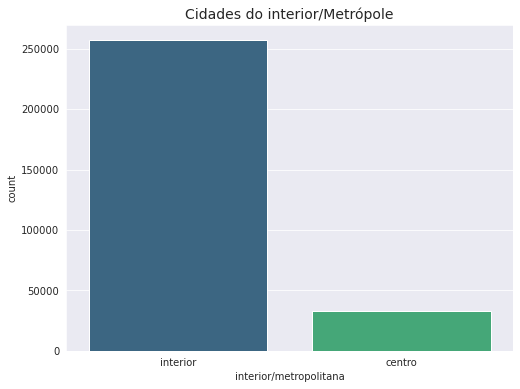

In [51]:
FONTSIZE=14
plt.figure(figsize=(8,6))
plt.title('Cidades do interior/Metrópole', fontsize=FONTSIZE)
sns.countplot(data=df_tocantins, x='interior/metropolitana', palette='viridis')

In [83]:
df_tocantins[df_tocantins['interior/metropolitana']=='interior'][['casosAcumulado', 'municipio']]

casosAcumulado    municipio
368              274.0  Abreulândia
369              274.0  Abreulândia
370              274.0  Abreulândia
371              276.0  Abreulândia
372              276.0  Abreulândia
...                ...          ...
290266           543.0      Xambioá
290267           545.0      Xambioá
290268           549.0      Xambioá
290269           552.0      Xambioá
290270           562.0      Xambioá

[286062 rows x 2 columns]

In [66]:
df_tocantins.head()

regiao estado municipio  coduf  codmun  codRegiaoSaude nomeRegiaoSaude  \
0  Norte     TO       NaN     17     NaN             NaN             NaN   
1  Norte     TO       NaN     17     NaN             NaN             NaN   
2  Norte     TO       NaN     17     NaN             NaN             NaN   
3  Norte     TO       NaN     17     NaN             NaN             NaN   
4  Norte     TO       NaN     17     NaN             NaN             NaN   

         data  semanaEpi  populacaoTCU2019  casosAcumulado  casosNovos  \
0  2021-07-01         26         1572866.0        198150.0         514   
1  2021-07-02         26         1572866.0        198803.0         653   
2  2021-07-03         26         1572866.0        199222.0         419   
3  2021-07-04         27         1572866.0        199455.0         233   
4  2021-07-05         27         1572866.0        199650.0         195   

   obitosAcumulado  obitosNovos  Recuperadosnovos  emAcompanhamentoNovos  \
0             3227           14               NaN                    NaN   
1             3237           10               NaN                    NaN   
2             3248           11               NaN                    NaN   
3             3256            8               NaN                    NaN   
4             3262            6               NaN                    NaN   

  interior/metropolitana  Unnamed: 0  Unnamed: 0.1  
0               interior         NaN           NaN  
1               interior         NaN           NaN  
2               interior         NaN           NaN  
3               interior         NaN           NaN  
4               interior         NaN           NaN